- Import required libraries

In [76]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

- Input Dataset ( CSV File) is present in Kaggle : https://www.kaggle.com/code/ahmedghobashi/detecting-early-alzheimer-s/input

In [31]:
# Load Cross Sectional MRI Data 
cross_mri_df = pd.read_csv('Input/oasis_cross-sectional.csv')

cross_mri_df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [32]:
# Load Longitudinal MRI Data 
long_mri_df = pd.read_csv('Input/oasis_longitudinal.csv')

long_mri_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### Use Longitudinal MRI Data as it has conclusive results and important Features

In [33]:
# Find the Volume for Cross Sectional MRI Data 
len(cross_mri_df)

436

In [34]:
# Find the Volume for Longitudinal MRI Data 
len(long_mri_df)

373

In [35]:
# Longitudinal MRI Data has info on multiple Visit. So keeping the 1st visit result. 
long_mri_df=long_mri_df[long_mri_df.Visit==1]
len(long_mri_df)

150

In [36]:
# Find out how many Null records are present in Longitudinal MRI Data
long_mri_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 370
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  150 non-null    object 
 1   MRI ID      150 non-null    object 
 2   Group       150 non-null    object 
 3   Visit       150 non-null    int64  
 4   MR Delay    150 non-null    int64  
 5   M/F         150 non-null    object 
 6   Hand        150 non-null    object 
 7   Age         150 non-null    int64  
 8   EDUC        150 non-null    int64  
 9   SES         142 non-null    float64
 10  MMSE        150 non-null    float64
 11  CDR         150 non-null    float64
 12  eTIV        150 non-null    int64  
 13  nWBV        150 non-null    float64
 14  ASF         150 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 18.8+ KB


In [37]:
long_mri_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [38]:
long_mri_df.Group.unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [39]:
# Replace Converted Group value to Demented
long_mri_df.Group=long_mri_df.Group.replace(['Converted'],['Demented'])
long_mri_df.Group.unique()

array(['Nondemented', 'Demented'], dtype=object)

In [40]:
# Remove less important features
long_mri_df = long_mri_df.drop(["Visit","Subject ID","MRI ID"],axis=1)

In [41]:
#Replace NAN value for SES to Mean of that Field.
mean_value=long_mri_df['SES'].mean() 
long_mri_df['SES'].fillna(value=mean_value, inplace=True)
long_mri_df.head()

,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
2,Demented,0,M,R,75,12,2.492958,23.0,0.5,1678,0.736,1.046
5,Nondemented,0,F,R,88,18,3.000000,28.0,0.0,1215,0.710,1.444
7,Nondemented,0,M,R,80,12,4.000000,28.0,0.0,1689,0.712,1.039
10,Demented,0,M,R,71,16,2.492958,28.0,0.5,1357,0.748,1.293


In [42]:
long_mri_df.Hand.unique()

array(['R'], dtype=object)

In [44]:
#One Hot Encoding to M/F ( Sex) and "Hand' Field"
long_mri_df = pd.get_dummies(long_mri_df,columns=['M/F', 'Hand'],dtype='int') 


In [45]:
long_mri_df.head()

,Group,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M,Hand_R
0,Nondemented,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1,1
2,Demented,0,75,12,2.492958,23.0,0.5,1678,0.736,1.046,0,1,1
5,Nondemented,0,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0,1
7,Nondemented,0,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1,1
10,Demented,0,71,16,2.492958,28.0,0.5,1357,0.748,1.293,0,1,1


In [46]:
# Remove less important features
long_mri_df = long_mri_df.drop(["MR Delay","M/F_F","Hand_R"],axis=1)

In [48]:
# Rename the Feature M/F to Sex
long_mri_df = long_mri_df.rename(columns={'M/F_M': 'Sex'})
long_mri_df.head()

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Sex
0,Nondemented,87,14,2.000000,27.0,0.0,1987,0.696,0.883,1
2,Demented,75,12,2.492958,23.0,0.5,1678,0.736,1.046,1
5,Nondemented,88,18,3.000000,28.0,0.0,1215,0.710,1.444,0
7,Nondemented,80,12,4.000000,28.0,0.0,1689,0.712,1.039,1
10,Demented,71,16,2.492958,28.0,0.5,1357,0.748,1.293,1


In [52]:
#Change the Position for feature and result Field
long_mri_df.columns
long_mri_df = long_mri_df[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF',
       'Sex','Group']]
long_mri_df.head()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Sex,Group
0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,1,Nondemented
2,75,12,2.492958,23.0,0.5,1678,0.736,1.046,1,Demented
5,88,18,3.000000,28.0,0.0,1215,0.710,1.444,0,Nondemented
7,80,12,4.000000,28.0,0.0,1689,0.712,1.039,1,Nondemented
10,71,16,2.492958,28.0,0.5,1357,0.748,1.293,1,Demented


In [53]:
#One hot Encoding for Result/Group field 
long_mri_df = pd.get_dummies(long_mri_df,columns=['Group'],dtype='int') 


,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Sex,Group_Demented,Group_Nondemented
0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,1,0,1
2,75,12,2.492958,23.0,0.5,1678,0.736,1.046,1,1,0
5,88,18,3.000000,28.0,0.0,1215,0.710,1.444,0,0,1
7,80,12,4.000000,28.0,0.0,1689,0.712,1.039,1,0,1
10,71,16,2.492958,28.0,0.5,1357,0.748,1.293,1,1,0


In [54]:
long_mri_df = long_mri_df.drop(["Group_Nondemented"],axis=1)
long_mri_df = long_mri_df.rename(columns={'Group_Demented': 'Result'})
long_mri_df.head()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Sex,Result
0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,1,0
2,75,12,2.492958,23.0,0.5,1678,0.736,1.046,1,1
5,88,18,3.000000,28.0,0.0,1215,0.710,1.444,0,0
7,80,12,4.000000,28.0,0.0,1689,0.712,1.039,1,0
10,71,16,2.492958,28.0,0.5,1357,0.748,1.293,1,1


In [56]:
long_mri_corr_df = long_mri_df.corr(method='spearman')

long_mri_corr_df

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Sex,Result
Age,1.000000,-0.085020,-0.014753,-0.125723,-0.050511,0.003393,-0.519069,-0.003488,-0.046478,0.004936
EDUC,-0.085020,1.000000,-0.706202,0.218558,-0.256270,0.202569,0.053676,-0.202476,0.072102,-0.219650
SES,-0.014753,-0.706202,1.000000,-0.153397,0.155762,-0.228056,0.037979,0.228088,-0.027461,0.072812
MMSE,-0.125723,0.218558,-0.153397,1.000000,-0.643701,-0.101386,0.293664,0.101548,-0.225423,-0.505649
CDR,-0.050511,-0.256270,0.155762,-0.643701,1.000000,0.025866,-0.293402,-0.025793,0.229319,0.818744
eTIV,0.003393,0.202569,-0.228056,-0.101386,0.025866,1.000000,-0.175898,-0.999986,0.561861,-0.021419
nWBV,-0.519069,0.053676,0.037979,0.293664,-0.293402,-0.175898,1.000000,0.176248,-0.258450,-0.262139
ASF,-0.003488,-0.202476,0.228088,0.101548,-0.025793,-0.999986,0.176248,1.000000,-0.561395,0.021419
Sex,-0.046478,0.072102,-0.027461,-0.225423,0.229319,0.561861,-0.258450,-0.561395,1.000000,0.210282
Result,0.004936,-0.219650,0.072812,-0.505649,0.818744,-0.021419,-0.262139,0.021419,0.210282,1.000000


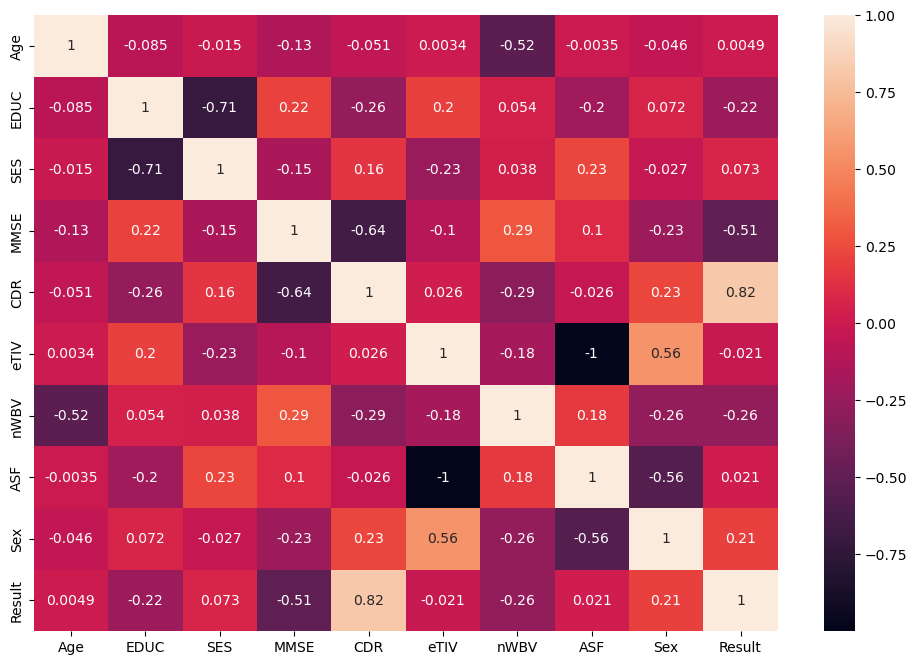

In [57]:
#Create heatmap using correlation Matrix 

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(long_mri_corr_df, annot=True)

plt.show()

In [58]:
# Create X ( Features ) and y ( Result) Dataset

X = long_mri_df.drop('Result', axis=1)

y = long_mri_df['Result']

In [59]:
# Split into Train and Test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

X_train.shape, X_test.shape

((120, 9), (30, 9))

In [65]:
# Scaling the Data
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
                                 columns=X_train.columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                                columns=X_test.columns)

In [66]:
#Function to get Training and Test score for different Model 

def build_model(regressor, X_train, y_train, X_test, y_test):
    
    model = regressor.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    result_dict = {'Training Score' :  training_score,
                   'Testing Score ' :  testing_score}
    
    return  result_dict

In [67]:
# Function for different metrics report 

def performance_metrics_report():
    
    for key in report_log:
        print('-' * 50)
        print('Regression Model -',key)
        print('-' * 50)
        
        print()
        for score in report_log[key]:
            print(score, report_log[key][score])

In [68]:
report_log = dict()

In [61]:
# Logistic Regression Model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [62]:
classifier.fit(X_train_scaled, y_train)

predictions = classifier.predict(X_test_scaled)

In [63]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)


,Prediction,Actual
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


In [64]:
# Accuracy Score is 93% 
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.9333333333333333

In [69]:
# Try Linear Regression Model 
report_log['Linear Regression'] = build_model(LinearRegression(), X_train, y_train, X_test, y_test)

performance_metrics_report()

--------------------------------------------------
Regression Model - Linear Regression
--------------------------------------------------

Training Score 0.6296831948363727
Testing Score  0.5670371522233935


In [70]:
# Try K Neighbor regression Model 

report_log['KNeighbors'] = build_model(KNeighborsRegressor(), X_train, y_train, X_test, y_test)

performance_metrics_report()

--------------------------------------------------
Regression Model - Linear Regression
--------------------------------------------------

Training Score 0.6296831948363727
Testing Score  0.5670371522233935
--------------------------------------------------
Regression Model - KNeighbors
--------------------------------------------------

Training Score 0.2471635150166851
Testing Score  -0.012499999999999956


In [71]:
report_log['SVR'] = build_model(SVR(), X_train, y_train, X_test, y_test)

performance_metrics_report()

--------------------------------------------------
Regression Model - Linear Regression
--------------------------------------------------

Training Score 0.6296831948363727
Testing Score  0.5670371522233935
--------------------------------------------------
Regression Model - KNeighbors
--------------------------------------------------

Training Score 0.2471635150166851
Testing Score  -0.012499999999999956
--------------------------------------------------
Regression Model - SVR
--------------------------------------------------

Training Score -0.49993608812335566
Testing Score  -0.4333856865131802


In [72]:
# Try Randon Forest Regression Model 

report_log['Random Forest'] = build_model(RandomForestRegressor(), X_train, y_train, X_test, y_test)

performance_metrics_report()

--------------------------------------------------
Regression Model - Linear Regression
--------------------------------------------------

Training Score 0.6296831948363727
Testing Score  0.5670371522233935
--------------------------------------------------
Regression Model - KNeighbors
--------------------------------------------------

Training Score 0.2471635150166851
Testing Score  -0.012499999999999956
--------------------------------------------------
Regression Model - SVR
--------------------------------------------------

Training Score -0.49993608812335566
Testing Score  -0.4333856865131802
--------------------------------------------------
Regression Model - Random Forest
--------------------------------------------------

Training Score 0.9435639599555061
Testing Score  0.6453705357142858


### Among different Models Logistic regression Model performs best. 

In [73]:
import joblib

In [74]:
# Export the Model 
joblib.dump(classifier,'final_model.pkl')

['final_model.pkl']

In [75]:
# Export Feature List 
X.columns
list(X.columns)
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']